In [26]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from scipy.stats import jarque_bera, normaltest, boxcox
import matplotlib.pyplot as plt

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'
                       .format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM studentsperformance', con=engine)

engine.dispose()

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?


In [3]:
scores = ['math score', 'reading score', 'writing score']

for i in scores:
    jb = jarque_bera(df[i])
    norm = normaltest(df[i])
    print('{} Jarque_Bera test statistic: {} and p value: {}'.format(i, jb[0], jb[1]))
    print('{} Normality test statistic: {} and p value: {}'.format(i, norm[0], norm[1]))

math score Jarque_Bera test statistic: 15.912256686712709 and p value: 0.0003505075386818213
math score Normality test statistic: 15.408960513931822 and p value: 0.00045080293869937836
reading score Jarque_Bera test statistic: 11.383300575987892 and p value: 0.0033740202672214448
reading score Normality test statistic: 11.11741279628622 and p value: 0.003853758403576582
writing score Jarque_Bera test statistic: 13.98509448257235 and p value: 0.0009187033894586527
writing score Normality test statistic: 13.606450837263859 and p value: 0.0011101885439899974


In [4]:
bc_math,_ = boxcox(df['math score'].loc[df['math score'] > 0])
bc_reading,_ = boxcox(df['reading score'])
bc_writing,_ = boxcox(df['writing score'])

bc_scores = [bc_math, bc_reading, bc_writing]

k = 0

for j in bc_scores:
    jb = jarque_bera(j)
    norm = normaltest(j)
    print('{} Jarque_Bera test statistic: {} and p value: {}'.format(scores[k], jb[0], jb[1]))
    print('{} Normality test statistic: {} and p value: {}'.format(scores[k], norm[0], norm[1]))
    k += 1

math score Jarque_Bera test statistic: 1.7200982636836308 and p value: 0.42314129209599327
math score Normality test statistic: 1.8323075851586939 and p value: 0.4000547794685686
reading score Jarque_Bera test statistic: 4.119778573559666 and p value: 0.127468081515408
reading score Normality test statistic: 5.28227460696581 and p value: 0.07128015626992969
writing score Jarque_Bera test statistic: 4.746478090042761 and p value: 0.09317842784043195
writing score Normality test statistic: 6.267311355052559 and p value: 0.04355827085003712


After applying the Box-Cox transformation and running our normality tests we can see that the p values increase in each case. This is an indication that our data became more normal than it previously was as a p value of 0 would indicate a non-normal distribution. 

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


In [5]:
#setting arbitrary weight values
math_w = .33
read_w = .33
write_w = .33

In [8]:
df['combined'] = math_w*df['math score'] + read_w*df['reading score'] + write_w*df['writing score']

bc_combined,_ = boxcox(df['combined'])

jb = jarque_bera(df['combined'])
norm = normaltest(df['combined'])

jb_bc = jarque_bera(bc_combined)
norm_bc = normaltest(bc_combined)


print('Combined score jarque_bera test stat {} and p value {}'.format(jb[0], jb[1]))
print('Combined score normality test stat {} and p value {}'.format(norm[0], norm[1]))
print('BoxCox Transformed Combined score jarque_bera test stat {} and p value {}'.format(jb_bc[0], jb_bc[1]))
print('BoxCox Transformed Combined score normality test stat {} and p value {}'.format(norm_bc[0], norm_bc[1]))

Combined score jarque_bera test stat 15.453387913085441 and p value 0.00044089934264401887
Combined score normality test stat 15.186721327231577 and p value 0.0005037851534493836
BoxCox Transformed Combined score jarque_bera test stat 2.435399093662389 and p value 0.2959101118879546
BoxCox Transformed Combined score normality test stat 2.77985790332585 and p value 0.24909300164653306


3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?


In [44]:
df.groupby('gender').mean()

,math score,reading score,writing score,combined
gender,,,,
female,63.633205,72.608108,72.467181,68.873803
male,68.728216,65.473029,63.311203,65.179108


In [45]:
df.groupby('gender')['combined'].mean()

gender
female    68.873803
male      65.179108
Name: combined, dtype: float64

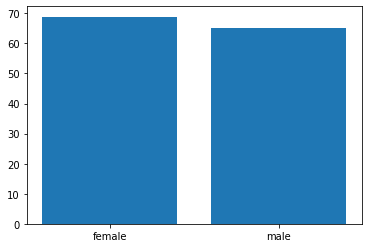

In [47]:
values = df.groupby('gender')['combined'].mean()
plt.bar(values.index, values)
plt.show()

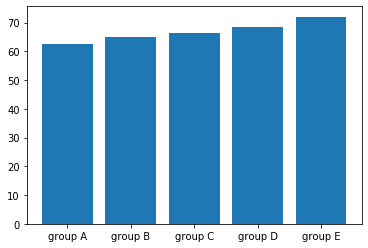

In [48]:
values = df.groupby('race/ethnicity')['combined'].mean()
plt.bar(values.index, values)
plt.show()


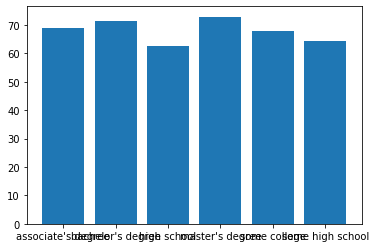

In [49]:
values = df.groupby('parental level of education')['combined'].mean()
plt.bar(values.index, values)
plt.show()


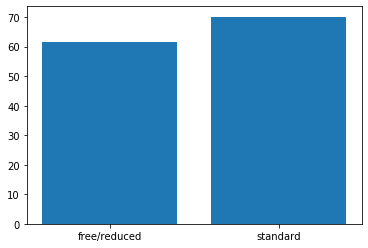

In [50]:
values = df.groupby('lunch')['combined'].mean()
plt.bar(values.index, values)
plt.show()


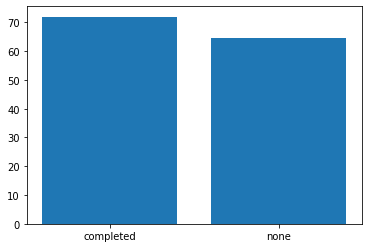

In [51]:
values = df.groupby('test preparation course')['combined'].mean()
plt.bar(values.index, values)
plt.show()


 If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?
 
All the variables seem to have an impact on the score that the student recieves in this dataset. 